<a href="https://colab.research.google.com/github/YesithW/Milling_PredictiveMaintenance/blob/main/Milling_Machine_Maintenance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kagglehub

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("stephanmatzka/predictive-maintenance-dataset-ai4i-2020")

print("Path to dataset files:", path)

100%|██████████| 136k/136k [00:00<00:00, 46.9MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/stephanmatzka/predictive-maintenance-dataset-ai4i-2020/versions/2


In [3]:
import pandas as pd
import numpy as np

# Replace with actual filename once known
df = pd.read_csv(path + "/ai4i2020.csv")
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [4]:
df.tail()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0
9999,10000,M24859,M,299.0,308.7,1500,40.2,30,0,0,0,0,0,0


In [5]:
import os
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [6]:
df.isnull().sum()

,0
UDI,0
Product ID,0
Type,0
Air temperature [K],0
Process temperature [K],0
Rotational speed [rpm],0
Torque [Nm],0
Tool wear [min],0
Machine failure,0
TWF,0


In [7]:
df['Machine failure'].value_counts()

,count
Machine failure,
0,9661
1,339


In [8]:
df = df.drop(columns=["UDI", "Product ID"])

In [9]:
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [10]:
df = pd.get_dummies(df, columns=["Type"], drop_first=True)

In [11]:
df.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Type_L,Type_M
0,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,False,True
1,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,True,False
2,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,True,False
3,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,True,False
4,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,True,False


In [12]:
df.tail()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Type_L,Type_M
9995,298.8,308.4,1604,29.5,14,0,0,0,0,0,0,False,True
9996,298.9,308.4,1632,31.8,17,0,0,0,0,0,0,False,False
9997,299.0,308.6,1645,33.4,22,0,0,0,0,0,0,False,True
9998,299.0,308.7,1408,48.5,25,0,0,0,0,0,0,False,False
9999,299.0,308.7,1500,40.2,30,0,0,0,0,0,0,False,True


In [13]:
X = df.drop(columns = ["Machine failure", "TWF", "HDF", "PWF", "OSF", "RNF"])
Y = df["Machine failure"]

In [14]:
X.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type_L,Type_M
0,298.1,308.6,1551,42.8,0,False,True
1,298.2,308.7,1408,46.3,3,True,False
2,298.1,308.5,1498,49.4,5,True,False
3,298.2,308.6,1433,39.5,7,True,False
4,298.2,308.7,1408,40.0,9,True,False


In [15]:
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, stratify=Y, test_size=0.2, random_state=42)

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
smote = SMOTE(random_state=42)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)

# Let's check the new class distribution
from collections import Counter
print("Before SMOTE:", Counter(Y_train))
print("After SMOTE: ", Counter(Y_train_resampled))


Before SMOTE: Counter({0: 7729, 1: 271})
After SMOTE:  Counter({0: 7729, 1: 7729})


In [19]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators = 200,
    random_state = 42,
    class_weight = "balanced"
)

model.fit(X_train_resampled, Y_train_resampled)


RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [20]:
from sklearn.metrics import classification_report, confusion_matrix

Y_pred = model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

Confusion Matrix:
 [[1883   49]
 [  17   51]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1932
           1       0.51      0.75      0.61        68

    accuracy                           0.97      2000
   macro avg       0.75      0.86      0.79      2000
weighted avg       0.97      0.97      0.97      2000



In [21]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [22]:
# Get probability estimates instead of hard class predictions
Y_probs = model.predict_proba(X_test)[:, 1]  # Probability of class 1 (failure)


In [23]:
fpr, tpr, thresholds = roc_curve(Y_test, Y_probs)
roc_auc = auc(fpr, tpr)


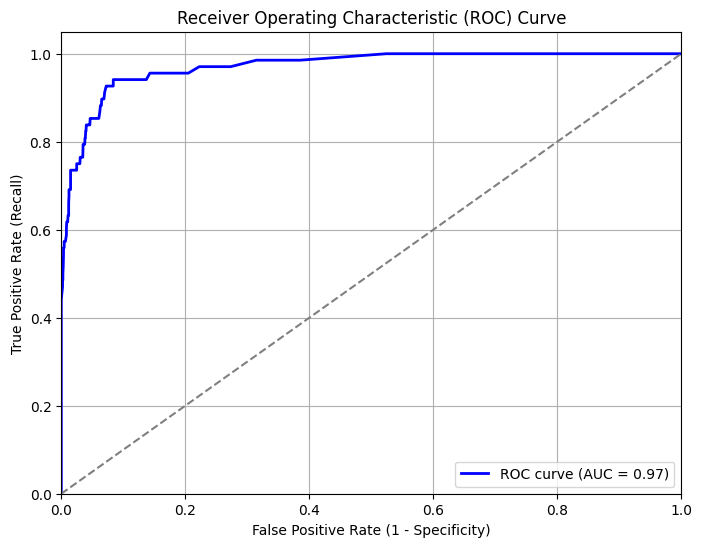

In [24]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (no skill)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


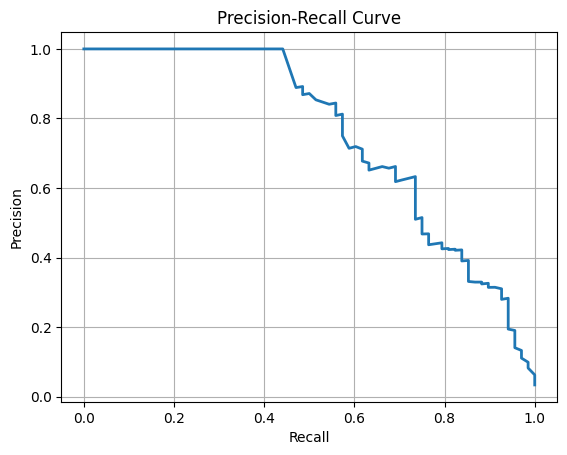

In [25]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(Y_test, Y_probs)
plt.plot(recall, precision, lw=2)
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid(True)
plt.show()


In [26]:
threshold = 0.3  # Try 0.4 or 0.25 too depending on the balance you want
Y_pred_custom = (Y_probs >= threshold).astype(int)


In [27]:
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred_custom))
print("\nClassification Report:\n", classification_report(Y_test, Y_pred_custom))


Confusion Matrix:
 [[1825  107]
 [  10   58]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.94      0.97      1932
           1       0.35      0.85      0.50        68

    accuracy                           0.94      2000
   macro avg       0.67      0.90      0.73      2000
weighted avg       0.97      0.94      0.95      2000



In [28]:
!pip install xgboost


In [29]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=6,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

xgb_model.fit(X_train_resampled, Y_train_resampled)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:22:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

In [30]:
Y_probs_XGB = xgb_model.predict_proba(X_test)[:, 1]
threshold = 0.3  # Try 0.4, 0.5 too
Y_pred_XGB = (Y_probs_XGB >= threshold).astype(int)

from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred_XGB))
print("\nClassification Report:\n", classification_report(Y_test, Y_pred_XGB))


Confusion Matrix:
 [[1816  116]
 [   8   60]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97      1932
           1       0.34      0.88      0.49        68

    accuracy                           0.94      2000
   macro avg       0.67      0.91      0.73      2000
weighted avg       0.97      0.94      0.95      2000



In [31]:
df['Mechanical Power [W]']=np.round((df['Torque [Nm]']*df['Rotational speed [rpm]']* 2 * np.pi) / 60,4)

In [32]:
df['temperature_difference']=df['Process temperature [K]']-df['Air temperature [K]']

In [33]:
df.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Type_L,Type_M,Mechanical Power [W],temperature_difference
0,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,False,True,6951.5906,10.5
1,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,True,False,6826.7227,10.5
2,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,True,False,7749.3875,10.4
3,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,True,False,5927.5047,10.4
4,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,True,False,5897.8166,10.5


In [34]:
X = df.drop(columns = ["Machine failure", "TWF", "HDF", "PWF", "OSF", "RNF"])
Y = df["Machine failure"]

In [35]:
from sklearn.model_selection import train_test_split

X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X,Y, stratify=Y, test_size=0.2, random_state=42)

In [36]:
from sklearn.preprocessing import StandardScaler

scaler2 = StandardScaler()
X_train = scaler2.fit_transform(X_train2)
X_test = scaler2.transform(X_test2)

In [37]:
smote = SMOTE(random_state=42)
X_train_resampled2, Y_train_resampled2 = smote.fit_resample(X_train2, Y_train2)

# Let's check the new class distribution
from collections import Counter
print("Before SMOTE:", Counter(Y_train2))
print("After SMOTE: ", Counter(Y_train_resampled2))

Before SMOTE: Counter({0: 7729, 1: 271})
After SMOTE:  Counter({0: 7729, 1: 7729})


In [38]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators = 200,
    random_state = 42,
    class_weight = "balanced"
)

model.fit(X_train_resampled2, Y_train_resampled2)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [39]:
from sklearn.metrics import classification_report, confusion_matrix

Y_pred2 = model.predict(X_test2)

print("Confusion Matrix:\n", confusion_matrix(Y_test2, Y_pred2))
print(classification_report(Y_test2, Y_pred2))

Confusion Matrix:
 [[1891   41]
 [  17   51]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1932
           1       0.55      0.75      0.64        68

    accuracy                           0.97      2000
   macro avg       0.77      0.86      0.81      2000
weighted avg       0.98      0.97      0.97      2000



In [40]:
Y_probs2 = model.predict_proba(X_test2)[:, 1]

In [41]:
fpr, tpr, thresholds = roc_curve(Y_test2, Y_probs2)
roc_auc = auc(fpr, tpr)


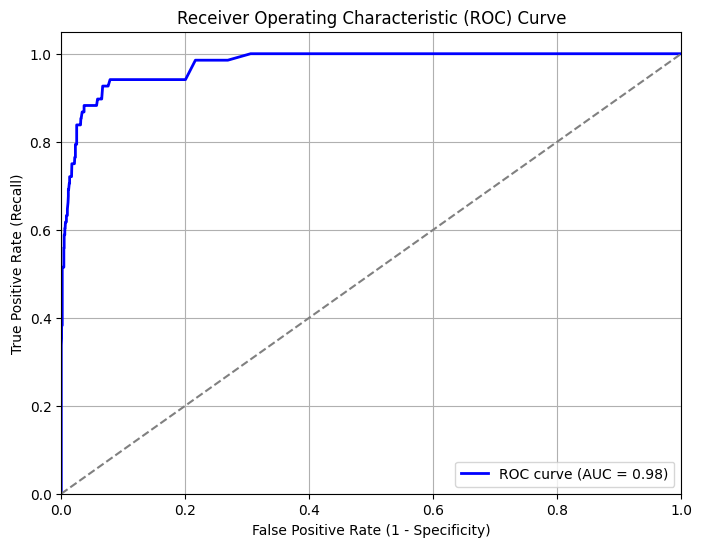

In [42]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (no skill)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


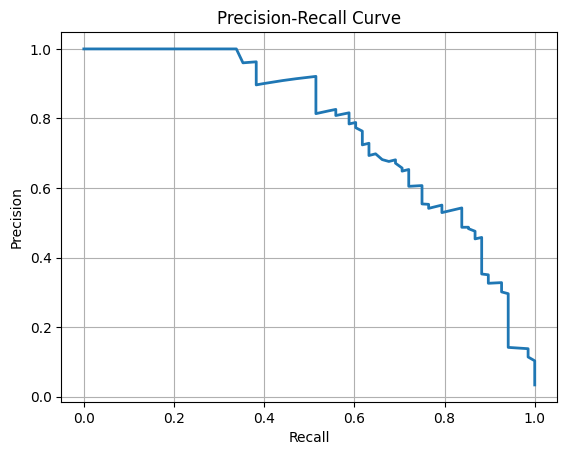

In [43]:
precision, recall, _ = precision_recall_curve(Y_test2, Y_probs2)
plt.plot(recall, precision, lw=2)
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid(True)
plt.show()